In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('CustomerData.csv')

In [3]:
df.head()

,CustID,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode
0,1,37.0,Male,USA,True,NaN,99.0,BabyCare,Cash,Offline
1,2,44.0,NaN,Russia,False,463034.0,21.0,BabyCare,Bank Transfer,NaN
2,3,900.0,Female,India,True,402865.0,31.0,Medical,UPI,Offline
3,4,46.0,NaN,USA,True,NaN,21.0,BabyCare,UPI,Offline
4,5,19.0,Female,Australia,True,221868.0,45.0,Medical,Bank Transfer,Online


In [4]:
df.loc[df['Age'] > 100, 'Age'] = np.nan

In [5]:
df['Age'] = df['Age'].fillna(int(df['Age'].mean()))
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['Employed'] = df['Employed'].fillna(df['Employed'].mode()[0])
df['Income'] = df['Income'].fillna(df['Income'].mean())
df['ItemsPurchased(monthly)'] = df['ItemsPurchased(monthly)'].fillna(int(df['ItemsPurchased(monthly)'].mean()))
df['ProductType'] = df['ProductType'].fillna(df['ProductType'].mode()[0])
df['PaymentType'] = df['PaymentType'].fillna(df['PaymentType'].mode()[0])
df['Mode'] = df['Mode'].fillna(df['Mode'].mode()[0])

In [6]:
df[['Gender', 'Country', 'Employed', 'ProductType', 'PaymentType', 'Mode']] = df[['Gender', 'Country', 'Employed', 'ProductType', 'PaymentType', 'Mode']].apply(LabelEncoder().fit_transform)

In [7]:
df.head()

,CustID,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode
0,1,37.0,1,4,1,242613.630435,99.0,1,1,0
1,2,44.0,1,1,0,463034.000000,21.0,1,0,1
2,3,50.0,0,3,1,402865.000000,31.0,4,2,0
3,4,46.0,1,4,1,242613.630435,21.0,1,2,0
4,5,19.0,0,2,1,221868.000000,45.0,4,0,1


In [8]:
X = df[['Age','Gender','Income','ItemsPurchased(monthly)']]
y = df['Mode']

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X)

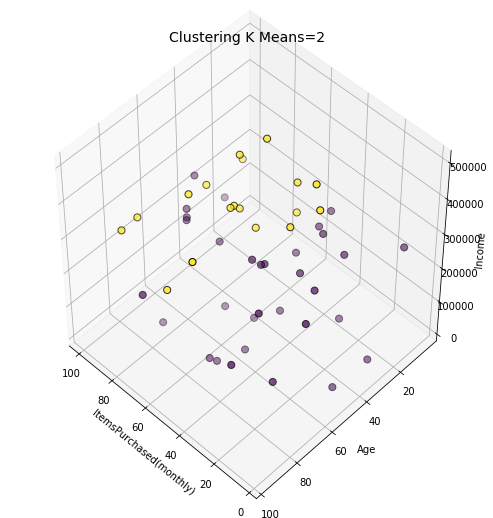

In [10]:
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:, 3], X.iloc[:, 0], X.iloc[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel('ItemsPurchased(monthly)')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
plt.title("Clustering K Means=2", fontsize=14)
plt.show()